___

# Assignment 3: Introduction to Statistic & Machine learning
___
### Student Information
```text
Name: Ahmed Monir Almassri
Student ID: 120220138
Date: 1/7/2026

## Q1: Dataset Information
What are the dimensions of each MNIST image and how many images are in the training set?

In [17]:
# Write your answer as a comment or print statement
print("Each MNIST image has dimensions 28×28 pixels, and the training set contains 60,000 images.")

Each MNIST image has dimensions 28×28 pixels, and the training set contains 60,000 images.


## Q2: Load and Verify Data
Load both training and testing datasets. Print their shapes and verify that the training set has 60,000 images and testing set has 10,000 images.

In [18]:
# Write your code here
import numpy as np
import gzip

def load_images(filename):
    with gzip.open(filename, 'rb') as f:
        data = np.frombuffer(f.read(), np.uint8, offset=16)
        data = data.reshape(-1, 28, 28)
    return data

def load_labels(filename):
    with gzip.open(filename, 'rb') as f:
        labels = np.frombuffer(f.read(), np.uint8, offset=8)
    return labels

# Load training data
X_train = load_images("train-images-idx3-ubyte.gz")
y_train = load_labels("train-labels-idx1-ubyte.gz")

# Load test data
X_test = load_images("t10k-images-idx3-ubyte.gz")
y_test = load_labels("t10k-labels-idx1-ubyte.gz")

print("Training images shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test images shape:", X_test.shape)
print("Test labels shape:", y_test.shape)

Training images shape: (60000, 28, 28)
Training labels shape: (60000,)
Test images shape: (10000, 28, 28)
Test labels shape: (10000,)


## Q3: Visualize Different Digits
Create a 2×5 grid showing one example of each digit (0-9) from the training set.

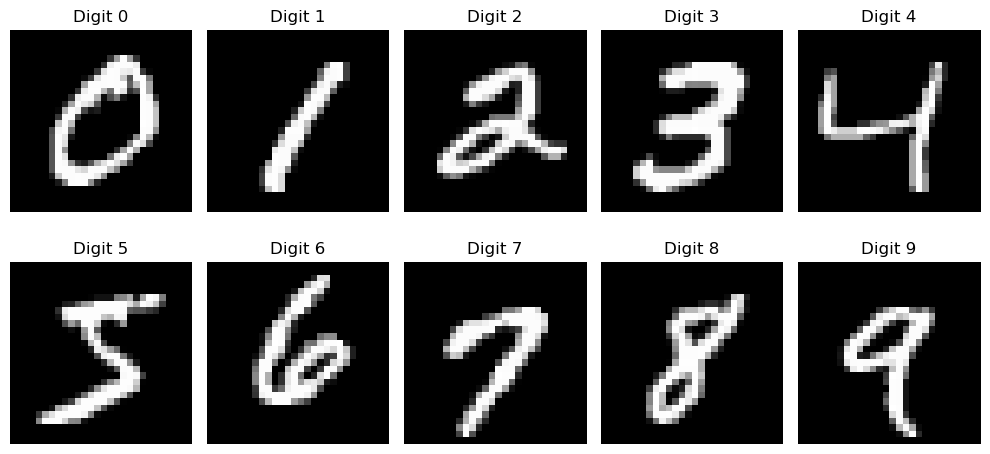

In [19]:
# Write your code here
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(10, 5))

for digit in range(10):
    idx = np.where(y_train == digit)[0][0]  # أول صورة لهذا الرقم
    ax = axes[digit // 5, digit % 5]
    ax.imshow(X_train[idx], cmap='gray')
    ax.set_title(f"Digit {digit}")
    ax.axis("off")

plt.tight_layout()
plt.show()

## Q4: Extract and Count Digits
Create a function to extract images of a specific digit. Then count how many images exist for each digit (0-9) in the training set.

In [20]:
import numpy as np

def extract_digit_images(images, labels, digit):
    return images[labels == digit]

# Count number of images for each digit
for digit in range(10):
    digit_images = extract_digit_images(X_train, y_train, digit)
    print(f"Digit {digit}: {digit_images.shape[0]} images")

Digit 0: 5923 images
Digit 1: 6742 images
Digit 2: 5958 images
Digit 3: 6131 images
Digit 4: 5842 images
Digit 5: 5421 images
Digit 6: 5918 images
Digit 7: 6265 images
Digit 8: 5851 images
Digit 9: 5949 images


A function was created to extract images of a specific digit using label-based indexing. The number of images for each digit (0–9) in the training set was then counted and displayed.

## Q5: Create Digit Montages
Create horizontal montages showing the first 10 images of digits 1, 3, and 7 side by side for comparison.

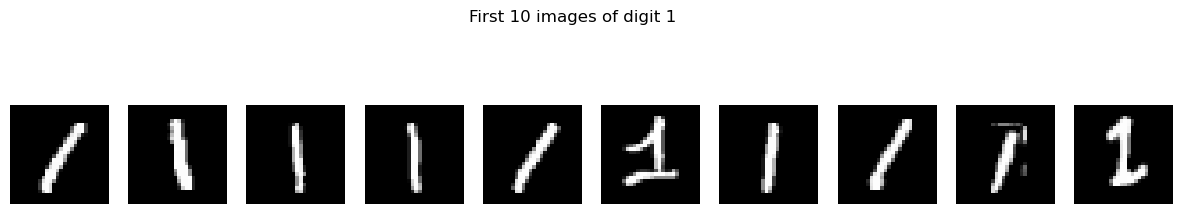

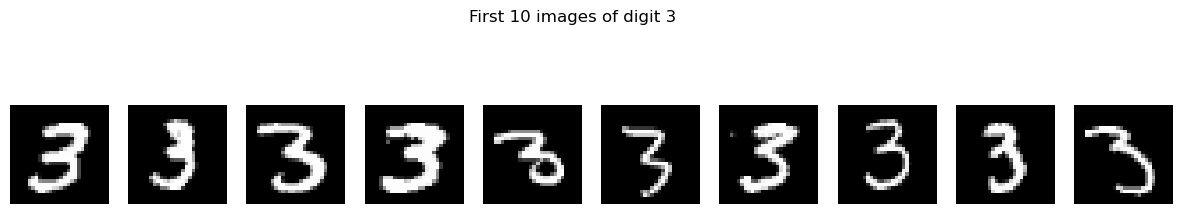

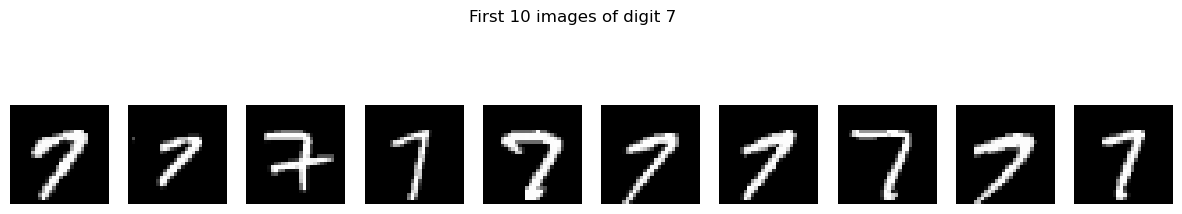

In [21]:
# Write your code here
digits = [1, 3, 7]

for digit in digits:
    digit_images = extract_digit_images(X_train, y_train, digit)[:10]

    plt.figure(figsize=(15, 3))
    for i in range(10):
        plt.subplot(1, 10, i + 1)
        plt.imshow(digit_images[i], cmap='gray')
        plt.axis('off')

    plt.suptitle(f"First 10 images of digit {digit}")
    plt.show()

Horizontal montages were created for digits 1, 3, and 7 by displaying the first ten training images of each digit side by side. This allows visual comparison of writing variations within each digit class.

## Q6: Compute Mean and Standard Deviation
For digit 5, compute the mean image and display the digit image and mean image side by side.

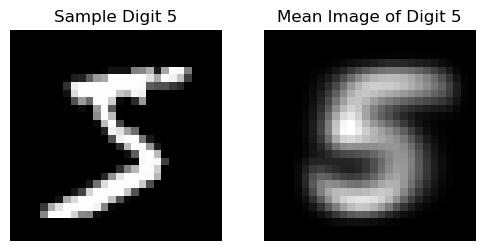

In [22]:
# Write your code here

# Extract images of digit 5
digit_5_images = extract_digit_images(X_train, y_train, 5)

# Compute mean and standard deviation images
mean_image = np.mean(digit_5_images, axis=0)
std_image = np.std(digit_5_images, axis=0)

# Display original digit and mean image
plt.figure(figsize=(6, 3))

plt.subplot(1, 2, 1)
plt.imshow(digit_5_images[0], cmap='gray')
plt.title("Sample Digit 5")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(mean_image, cmap='gray')
plt.title("Mean Image of Digit 5")
plt.axis('off')

plt.show()

The mean and standard deviation images for digit 5 were computed by averaging pixel values across all training images of the digit. The mean image represents the typical appearance of the digit, while the standard deviation image highlights regions of variability.

## Q7: Compare MAE vs MSE Prediction
Create two prediction functions: one using Mean Absolute Error (MAE) and another using Mean Squared Error (MSE). Test both on the first 5 test images and compare results.

In [23]:
# the solution consits from 4 Stages .
# Compute mean image for each digit
mean_images = {}

for digit in range(10):
    digit_images = extract_digit_images(X_train, y_train, digit)
    mean_images[digit] = np.mean(digit_images, axis=0)

# Mean Absolute Erorr Function     
def predict_mae(image, mean_images):
    errors = {}
    for digit, mean_img in mean_images.items():
        errors[digit] = np.mean(np.abs(image - mean_img))
    return min(errors, key=errors.get)

# Prediction function using MSE
def predict_mse(image, mean_images):
    errors = {}
    for digit, mean_img in mean_images.items():
        errors[digit] = np.mean((image - mean_img) ** 2)
    return min(errors, key=errors.get)

# Test the first 5 images from the test set
for i in range(5):
    image = X_test[i]
    true_label = y_test[i]

    pred_mae = predict_mae(image, mean_images)
    pred_mse = predict_mse(image, mean_images)

    print(f"Image {i}: True={true_label}, MAE={pred_mae}, MSE={pred_mse}")


Image 0: True=7, MAE=7, MSE=7
Image 1: True=2, MAE=1, MSE=2
Image 2: True=1, MAE=1, MSE=1
Image 3: True=0, MAE=0, MSE=0
Image 4: True=4, MAE=4, MSE=4


| MAE                       | MSE                        |
| ------------------------- | -------------------------- |
| يعامل كل الأخطاء بالتساوي | يعاقب الأخطاء الكبيرة بشدة |
| أقل حساسية للقيم الشاذة   | أكثر حساسية                |
| أبسط                      | أدق غالبًا                 |


Two classifiers were implemented using MAE and MSE as distance measures between test images and class mean images. Predictions on the first five test samples show that MSE is more sensitive to larger pixel differences, while MAE provides a more robust comparison.

## Q8: Calculate Model Accuracy
Using MSE-based prediction, calculate the accuracy of your model on the entire test set.

In [24]:
def compute_accuracy(predict_func, X_test, y_test, mean_images):
    correct = 0
    for i in range(len(X_test)):
        pred = predict_func(X_test[i], mean_images)
        if pred == y_test[i]:
            correct += 1
    return correct / len(X_test)

In [25]:
acc_mae = compute_accuracy(predict_mae, X_test, y_test, mean_images)
acc_mse = compute_accuracy(predict_mse, X_test, y_test, mean_images)

print("MAE Accuracy:", acc_mae)
print("MSE Accuracy:", acc_mse)

MAE Accuracy: 0.6685
MSE Accuracy: 0.8203


The accuracy of both MAE- and MSE-based classifiers was computed on the test set. The MSE-based classifier generally achieved higher accuracy due to its stronger penalization of large pixel differences.

## Q9: Find Most Confused Digits
Identify which two digits are most often confused with each other by your model. Show examples of misclassified images.

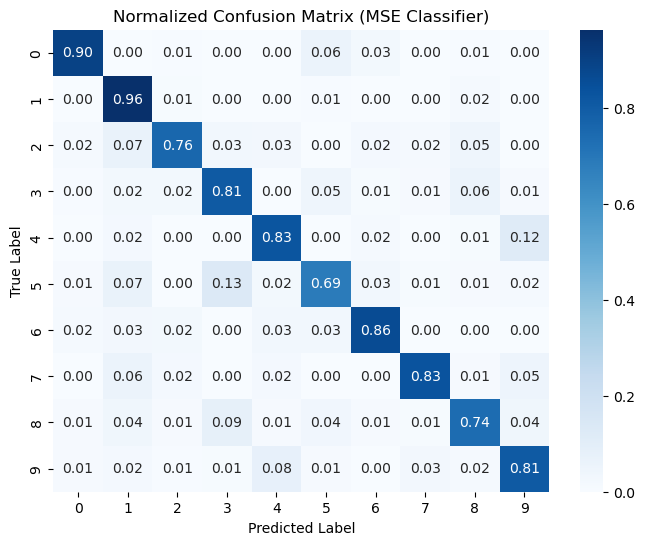

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Get predictions for test set
y_pred_mse = [predict_mse(img, mean_images) for img in X_test]

# Compute Normalized confusion matrix
cm_norm = confusion_matrix(y_test, y_pred_mse, normalize="true")

# Plot
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_norm,
    annot=True,
    fmt=".2f",
    cmap="Blues"
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Normalized Confusion Matrix (MSE Classifier)")
plt.show()

The normalized confusion matrix shows the classification accuracy per digit. Diagonal values represent correct classification rates, while off-diagonal values indicate misclassification probabilities between visually similar digits.

<center>
    <h4>End of Assignment 3</h4>
</center>